In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from torch_geometric.utils import to_networkx
import torch

In [3]:
def get_node_features(df_row):
    cols = [
        i.startswith("atr_") | i.startswith("ds") | i.startswith("aag_") | i.startswith("atr_") | i.startswith("bon_")
        for i in list(df_row.keys())
    ]

    return df_row.loc[cols]

In [4]:
def create_graph_from(csv_path, entry, max_distance=16.0):
    csv = pd.read_csv(csv_path)
    csv = csv.loc[csv.description == entry].sort_values(by=["residue_no"])
    G = nx.Graph()

    for row in csv.iterrows():
        G.add_node(int(row[1]["residue_no"]), **dict(get_node_features(row[1])))
    for r, row in enumerate(csv.iterrows()):
        x, y, z = row[1][["x", "y", "z"]]
        for row2 in list(csv.iterrows())[r + 1 :]:
            x1, y1, z1 = row2[1][["x", "y", "z"]]
            distance = ((x1 - x) ** 2 + (y1 - y) ** 2 + (z1 - z) ** 2) ** 0.5
            if distance <= max_distance:
                # if float(row[1]["pairings_with"]) == float(row2[1]["residue_no"]):
                    # G.add_edge(row[1]["residue_no"], row2[1]["residue_no"], distance=distance, pairings_with=True)
                # else:
                    G.add_edge(
                        row[1]["residue_no"],
                        row2[1]["residue_no"],
                        distance=distance,
                        pairings_with=False,
                    )

    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    nodelist = G.nodes()
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    # edges, weights = zip(*nx.get_edge_attributes(G, "pairings_with").items())
    edges, distance = zip(*nx.get_edge_attributes(G, "distance").items())

    pos = nx.spring_layout(G, seed=1969)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)

    nx.draw_networkx_edges(
        Gcc,
        pos,
        ax=ax0,
        alpha=0.4,
        # edge_color=weights,
        edge_cmap=plt.cm.cool,
        width=[(max_distance - i) / 4 for i in distance],
    )
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(nodelist, nodelist)), font_color="black")
    ax0.set_title(f"Connected components of {entry}")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()
    display()

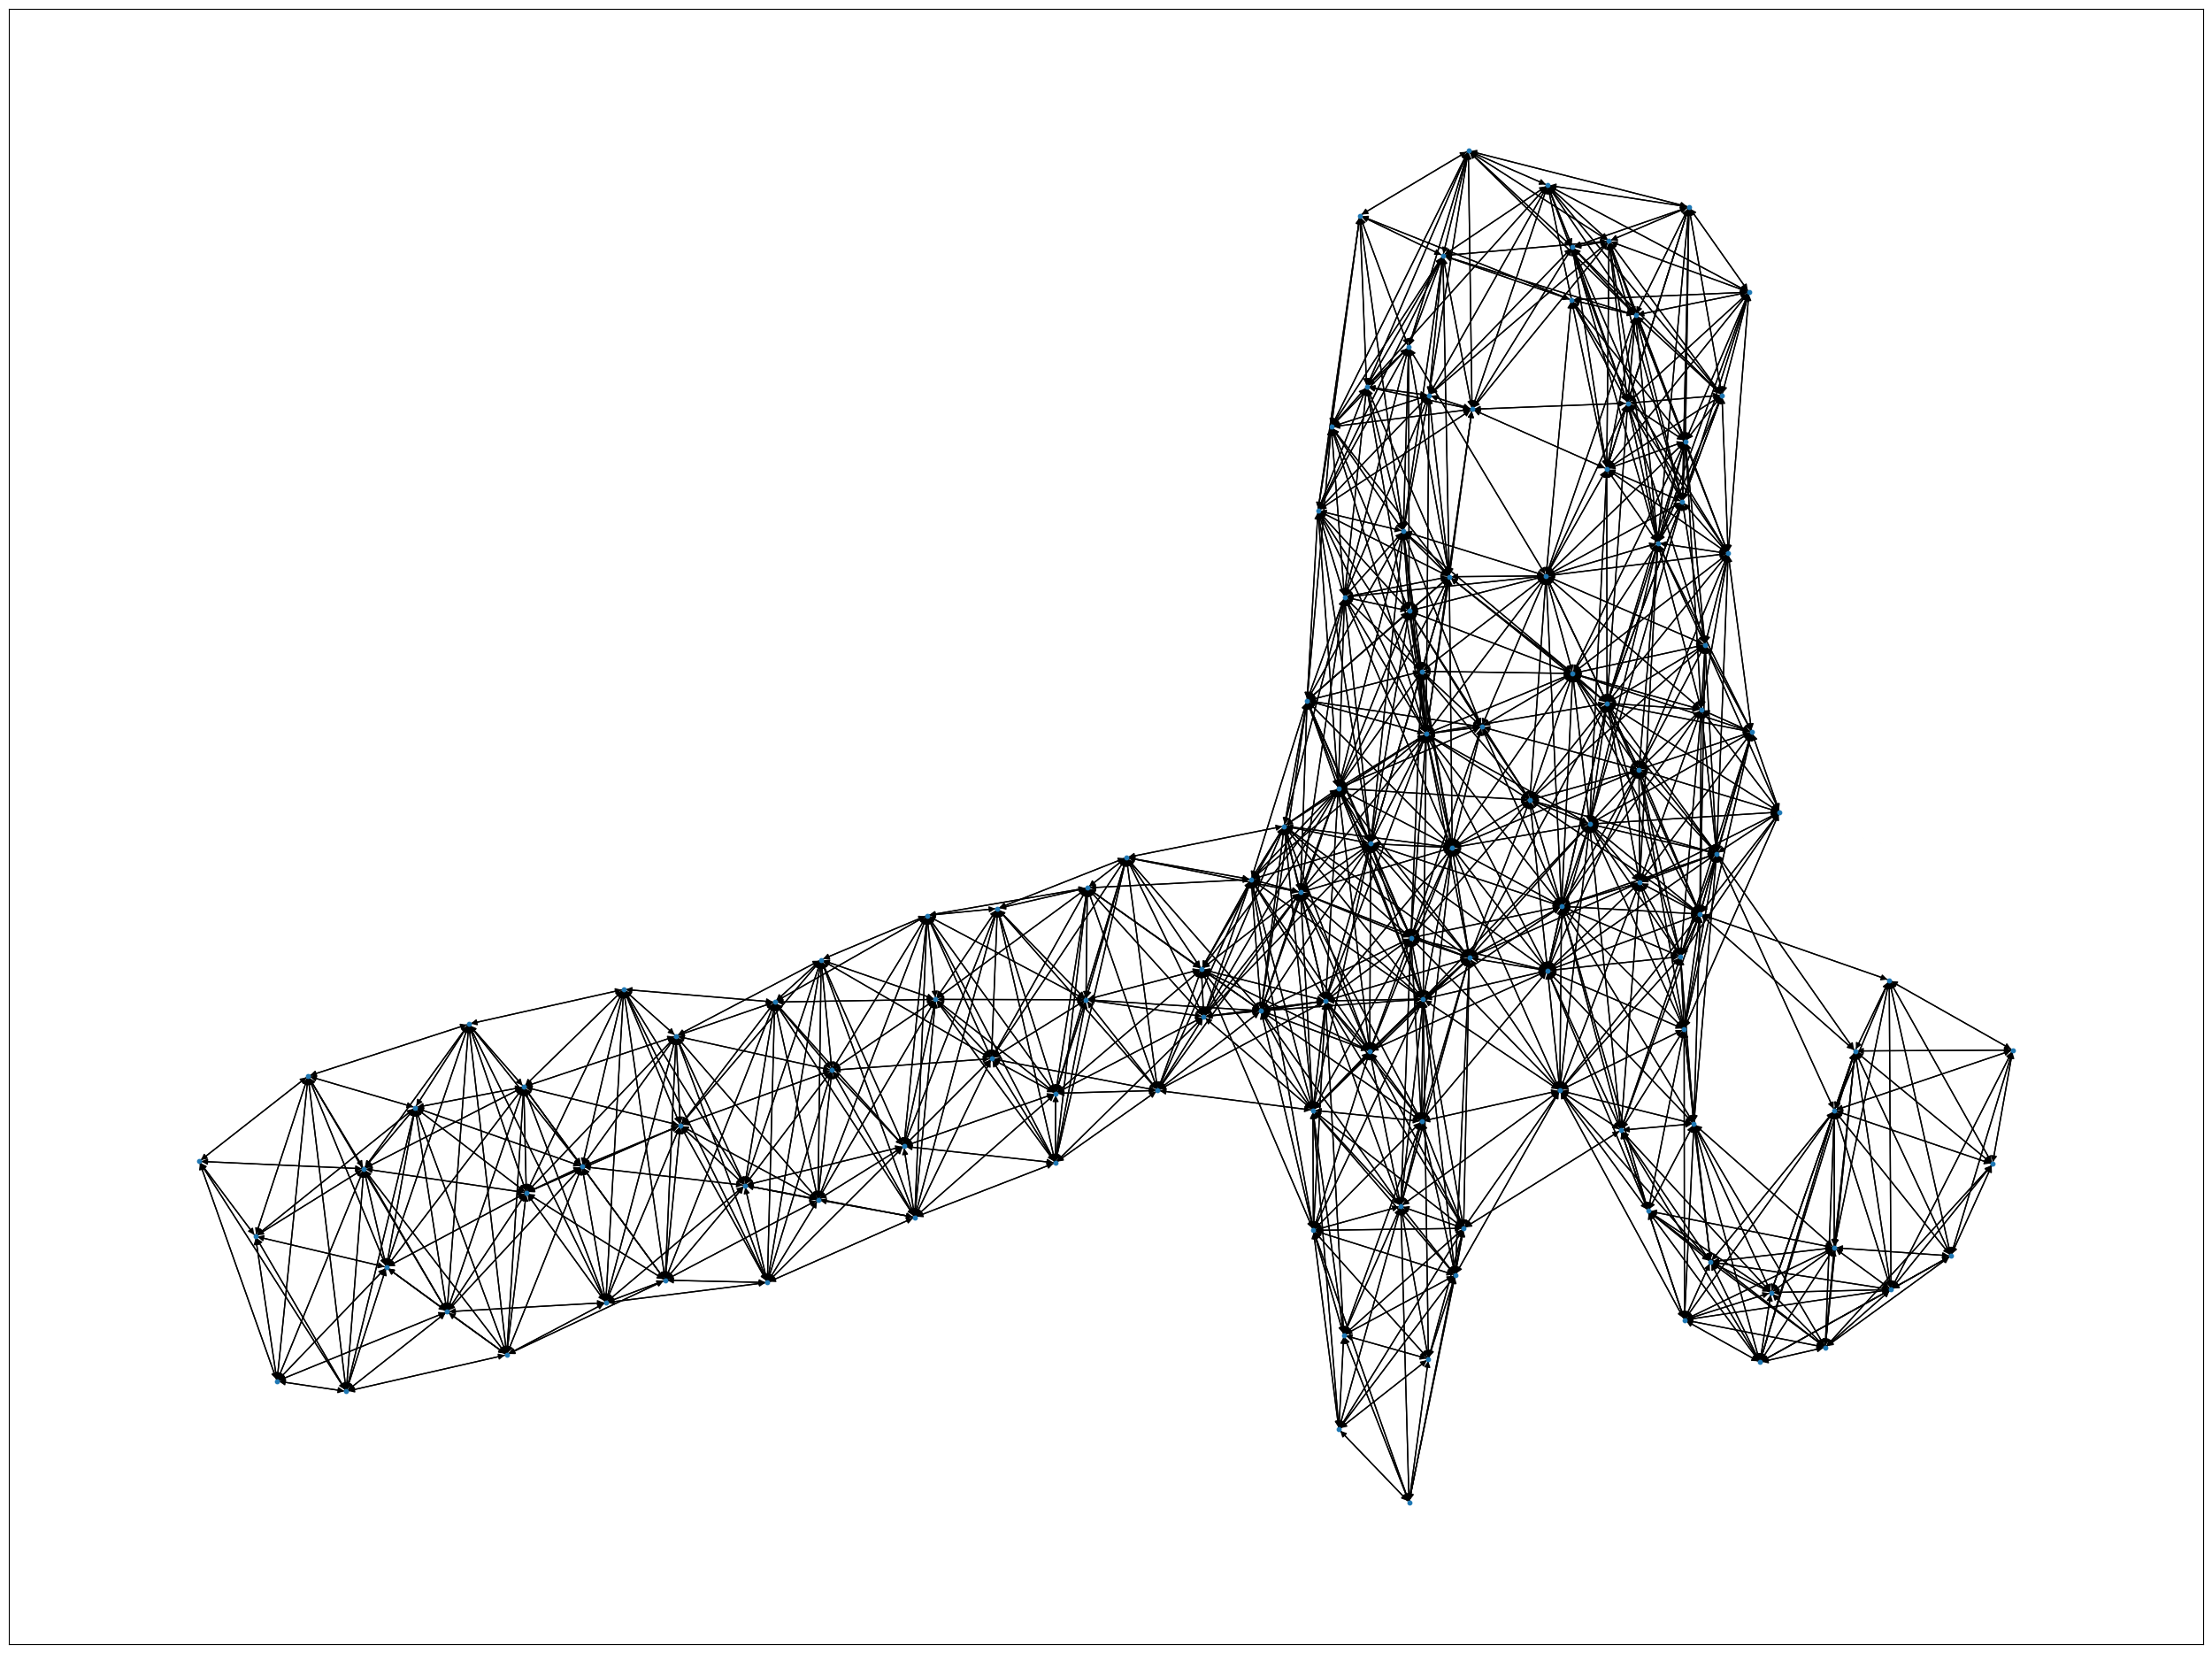

In [18]:
graph = to_networkx(torch.load(
                    "/home/adamczykb/rnaquanet/data/06_model_input/PZ04/test/4_adamiak_1_rpr.pt", weights_only=False
                ), to_undirected=False)


# Draw the graph
plt.figure(3,figsize=(32,24)) 
pos = nx.kamada_kawai_layout(graph)
nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=False,
    node_size=10,
    
)
plt.show()

/tmp/ipykernel_292725/2633493217.py:2: DtypeWarning: Columns (73,75,79,81,83,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(csv_path)


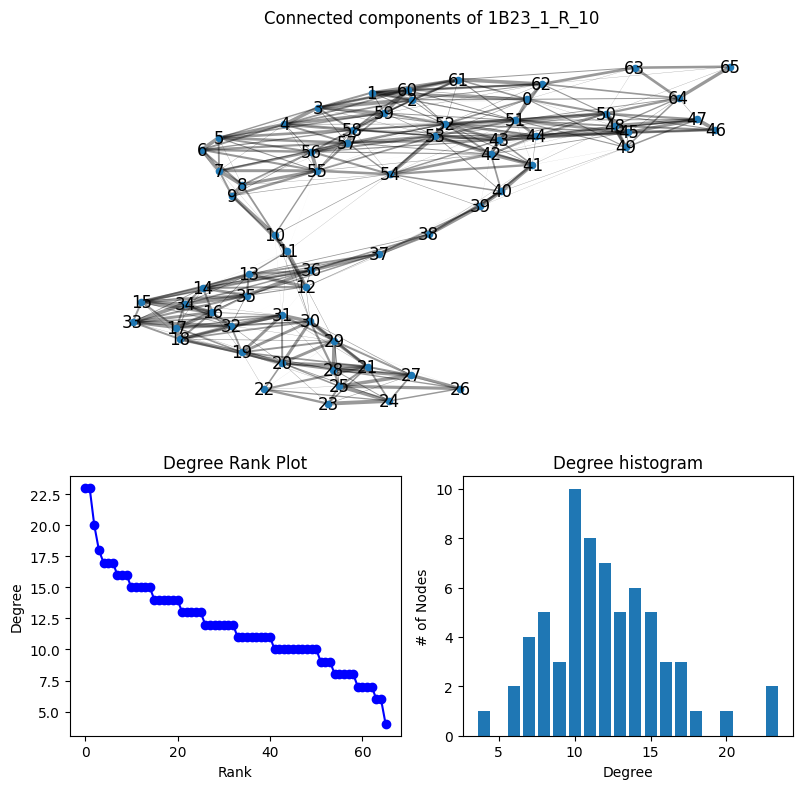

In [6]:
create_graph_from(
    "/home/adamczykb/rnaquanet/data/05_feature_compressed/rnaquanet_structures/train_compressed.csv",
    "1B23_1_R_10",
    max_distance=16.0,
)

/tmp/ipykernel_274249/2633493217.py:2: DtypeWarning: Columns (63,76,79,87,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(csv_path)


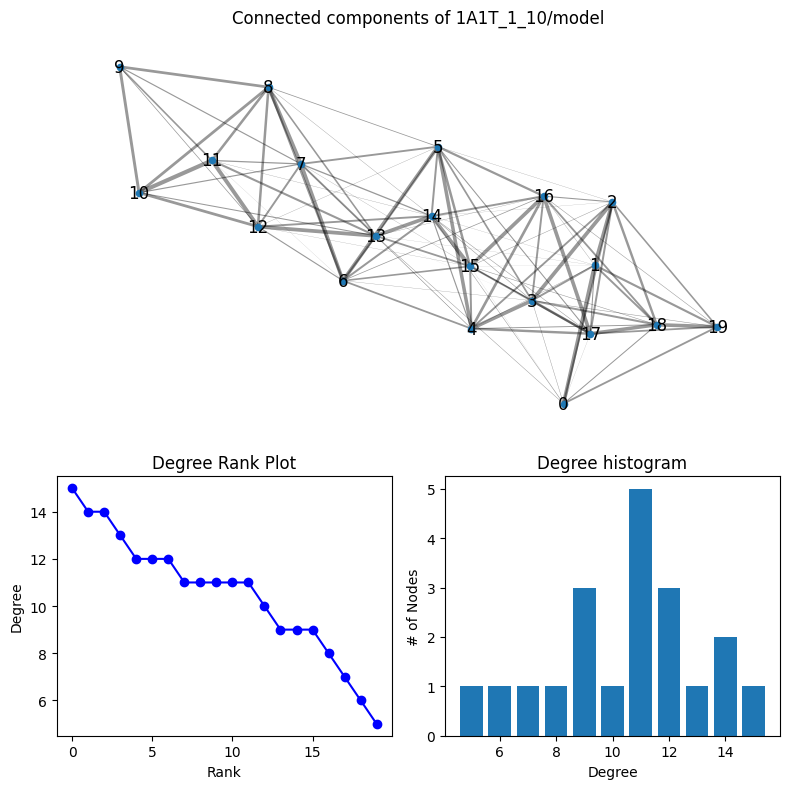

In [23]:
create_graph_from(
    "/home/adamczykb/rnaquanet/data/05_feature_compressed/lociparse_structures/train_compressed.csv",
    "1A1T_1_10/model",
    max_distance=16.0,
)

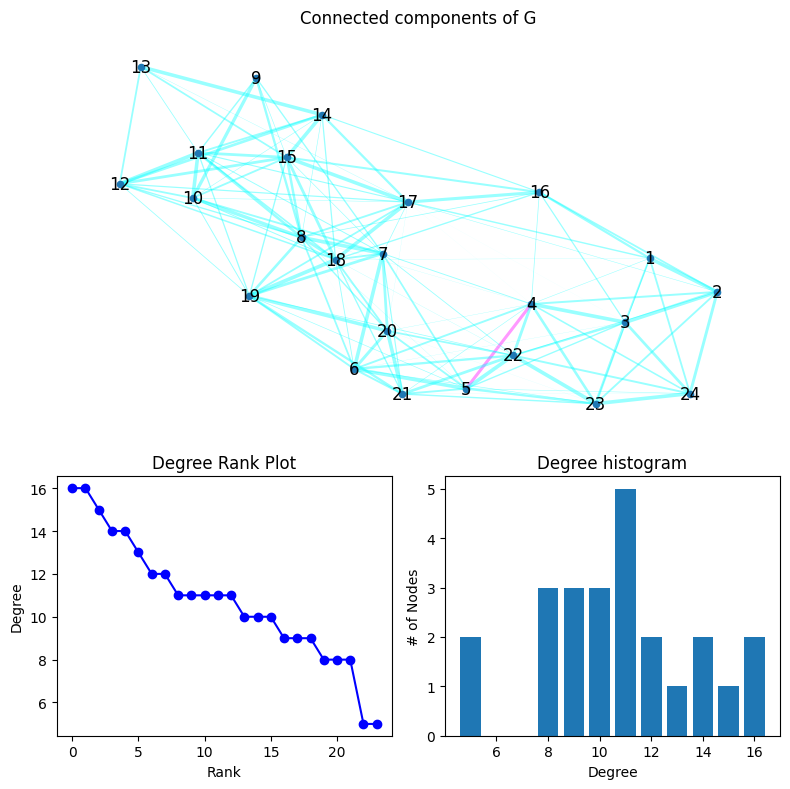

In [64]:
csv.shape

(34, 105)